In [1]:
import nltk
import spacy
import re
import os
from nltk.probability import FreqDist
from nltk.corpus import treebank
nlpEN = spacy.load("en_core_web_sm")
nlpEL = spacy.load("el_core_news_sm")
import string
import matplotlib.pyplot as plt
from tabulate import tabulate

# from fuzzywuzzy import fuzz
# fuzz.WRatio
# nltk.download('treebank')

# English Tokenizers

Στο treebank Corpus υπάρχουν κάποιες extra προτάσεις, οι οποίες δεν υπήρχαν στο σώμα δεδομένων που αναλύουμε με αποτέλεσμα να υπάρχουν κάποιες αποκλείσεις ως προς τα metrics. Εκτός απο την επεξεργασία των κειμένων σχετικά με τα περιττά κενά, χρειάστηκε και επεξεργασία το αντίστοιχο ground truth κείμενο.


In [3]:
# C:\\Users\\ppetropo\\Desktop\\NLP\\NLP_Exercises\\Exe1_NLP
path = "assignment1textfiles\\wsj_untokenized.txt"
# os.chdir(path)
def joinGroundTruthTokenInOneList(treebankFiles, isTokenizer = True):
    tokens = list()
    if isTokenizer:
        for file in treebankFiles:
            tmpTokens = treebank.words(file)
            for index in range(len(tmpTokens)):
                tokens.append(tmpTokens[index])
    else: 
        for file in treebankFiles:
            tmpTokens = treebank.sents(file)
#             print(tmpTokens[0])
#             break;
#             tokens.append(tmpTokens) 
            for index in range(len(tmpTokens)):
                tmpSent = ' '.join(tmpTokens[index])
                tmpSent = tmpSent.replace(" ,", ',')
                tmpSent = tmpSent.replace(" .", '.')
                tokens.append(tmpSent)

            
    return tokens

def customTokenizer(text):
    pattern = re.compile(r'(?:[A-Z]\.)+|[A-Za-z]+\.|\d+(?:[\./]\d+)|n\'t|\b\w+(?!\'t)|\w+(?:-\w+)*|[!\"#$%&\'()*+,./:;<=>?@[\]^_`{|}~]|-{2}')  
    tmpTokens = pattern.findall(text)
    tokens = list()
    for i in tmpTokens:
        i = i.strip()
        i = i.replace('/','\\/')
        tokens.append(i)
    
    return tokens
# (?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<![A-Z]\.)(?<![A-Za-z]\.[\d])(?<=\.|\?)\s
# (?<=[^A-Z].[.?!]) +(?=[A-Z])
def customSentencize(text):#(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?) 
    tmpSetences =  re.split(r'(?<=[^A-Z].[.?!\'\']|[^A-Z]\s[.?!\'\']) +(?=[A-Z])', text)
    stetences = list()
    for i in tmpSetences:
        i = i.strip()
        stetences.append(i)
#     print(stetences)
    return stetences
def calcPrecision(texts, treebankTokens, isTokenization = True,counter = 0): 
    precision = 0.0
    if isTokenization == True : #calculate precision for tokens
#         matchedTokens = [x for x in texts + treebankTokens if x in texts and x in treebankTokens]
#         matchedTokens = set(texts).intersection(treebankTokens) # pairnw tin tomi. 
        counter = 0 
        for token in texts:
            if token in treebankTokens:
                counter = counter + 1
        print("No. of groundTruthTokens = ",len(treebankTokens))
        relevantTokens = counter
        print("Relevant Tokens = ",relevantTokens)
        retrievedTokens = len(texts)
        print("Retrieved Tokens = ",retrievedTokens)
        precision = relevantTokens  / retrievedTokens
        print("Precision = ",precision)
    else:
    
        print("No. of groundTruthSetences = ",len(treebankTokens))
        relevantTokens = counter
        print("Relevant Setences = ",relevantTokens)
        retrievedTokens = len(texts)
        print("Retrieved Setences = ",retrievedTokens)
        precision = relevantTokens  / retrievedTokens
        print("Precision = ",precision)
      
    return precision

    
def calcRecall(texts, treebankTokens, isTokenization = True, counter = 0):
    recall = 0.00
    if isTokenization == True : #calculate recall for tokens
#         matchedTokens = [x for x in texts + treebankTokens if x in texts and x in treebankTokens]
#         matchedTokens = set(texts).intersection(treebankTokens) # pairnw tin tomi. 
        counter = 0    
        for token in texts:
            if token in treebankTokens:
                counter = counter + 1
        relevantTokens = counter
        correctTokens = len(treebankTokens)
        recall = relevantTokens  / correctTokens
        print("Recall = ",recall)
    else:
        print("No. of groundTruthSetences = ",len(treebankTokens))
        relevantTokens = counter
        correctTokens = len(treebankTokens)
        recall = relevantTokens  / correctTokens
        print("Recall = ",recall)
         
    return recall

def calcF1Score(precision, recall):
    f1 = (2 * precision * recall) / (precision + recall)
    return f1

sentencizer = nltk.tokenize.PunktSentenceTokenizer()
with open(path,'r') as f:
    text = f.read()
    #Tokens
    tokensWordTokenize = nltk.tokenize.word_tokenize(text)
    tokensWordPunctTokenize = nltk.tokenize.wordpunct_tokenize(text)
    docSpacy = nlpEN(text)
    #Setences
    nltkSentTokens = nltk.sent_tokenize(text)
    nltkSentPunctTokenize = sentencizer.tokenize(text)

setencesSpacy = list()
for setence in docSpacy.sents:
    setencesSpacy.append(setence.text)

tokensSpacy = list()
for token in docSpacy:
    tokensSpacy.append(token.text)
    
files = treebank.fileids()
customTokens = customTokenizer(text)
customSetences = customSentencize(text)
groundTruthTokens = joinGroundTruthTokenInOneList(files)

groundTruthSentences = joinGroundTruthTokenInOneList(files,False)
# print(groundTruthSentences)









# English Tokenizers Metrics - Analysis

======================================ENGLISH=============================================
No. of groundTruthTokens =  100676
Relevant Tokens =  92511
Retrieved Tokens =  93273
Precision =  0.9918304332443473
Recall =  0.9188982478445707


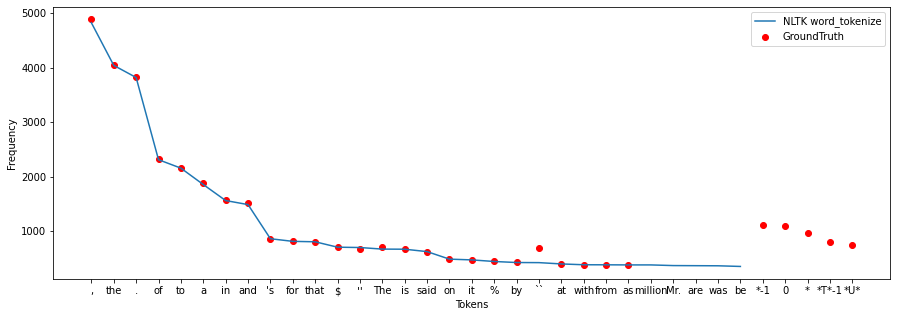

No. of groundTruthTokens =  100676
Relevant Tokens =  95759
Retrieved Tokens =  100637
Precision =  0.9515287617874142
Recall =  0.9511601573364059
F1 - Score =  0.9513444238573764


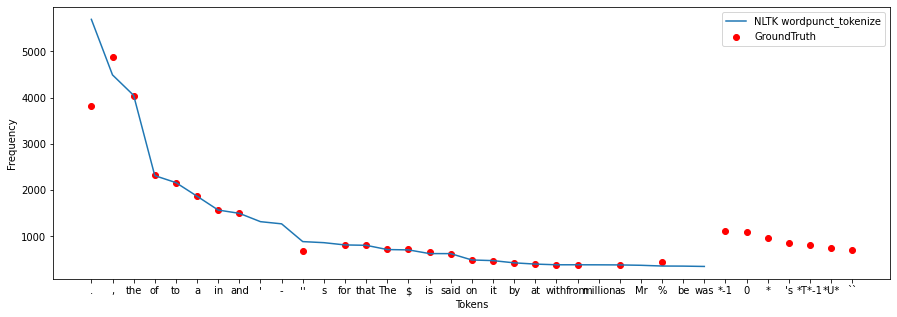

No. of groundTruthTokens =  100676
Relevant Tokens =  95106
Retrieved Tokens =  95893
Precision =  0.9917929358764456
Recall =  0.9446740037347531
F1 - Score =  0.9676602109183036


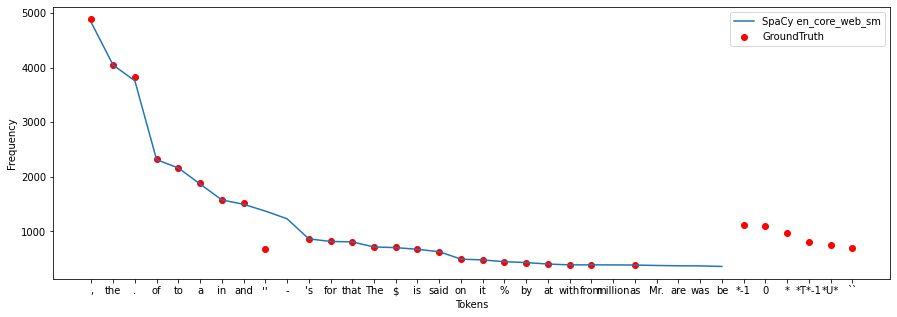

No. of groundTruthTokens =  100676
Relevant Tokens =  88902
Retrieved Tokens =  94120
Precision =  0.9445601359966
Recall =  0.8830505780920974
F1 - Score =  0.9127702827573461


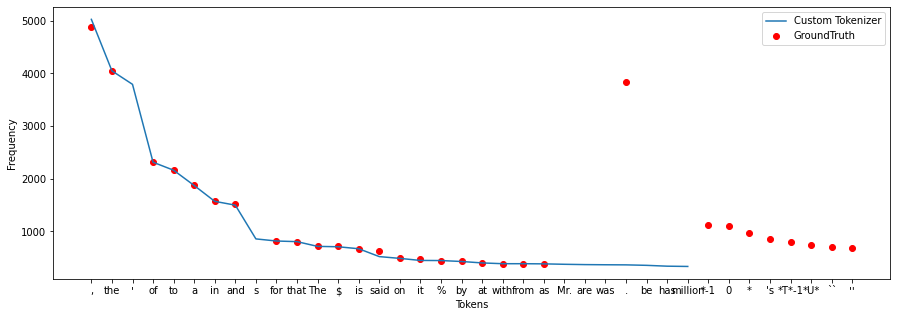

In [4]:
print("======================================ENGLISH=============================================")


precision = calcPrecision(tokensWordTokenize, groundTruthTokens)    
recall = calcRecall(tokensWordTokenize, groundTruthTokens)
f1nltkEN = calcF1Score(precision, recall)
# print("F1 - Score = ",f1nltkEN)
dic = FreqDist(tokensWordTokenize)
filter_tokens1 = dict([(m, n) for m, n in dic.items() if n == 1])
observed1_1 = len(filter_tokens1)/len(dic)
top30_1 = FreqDist(tokensWordTokenize).most_common(30)
top30_1Truth = FreqDist(groundTruthTokens).most_common(30)
plt.figure(figsize=(15, 5))
plt.plot(*zip(*top30_1),label='NLTK word_tokenize')
plt.scatter(*zip(*top30_1Truth),color = 'red',label='GroundTruth')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.legend(loc="upper right")
plt.show()


precision = calcPrecision(tokensWordPunctTokenize, groundTruthTokens)    
recall = calcRecall(tokensWordPunctTokenize, groundTruthTokens)
f1nltkEN2 = calcF1Score(precision, recall)
print("F1 - Score = ",f1nltkEN2)
dic2 = FreqDist(tokensWordPunctTokenize)
filter_tokens2 = dict([(m, n) for m, n in dic2.items() if n == 1])
observed1_2 = len(filter_tokens2)/len(dic2)
top30_2 = FreqDist(tokensWordPunctTokenize).most_common(30)
top30_2Truth = FreqDist(groundTruthTokens).most_common(30)
plt.figure(figsize=(15, 5))
plt.plot(*zip(*top30_2),label='NLTK wordpunct_tokenize')
plt.scatter(*zip(*top30_1Truth),label='GroundTruth',color = 'red')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.legend(loc="upper right")
plt.show()



precision = calcPrecision(tokensSpacy, groundTruthTokens)    
recall = calcRecall(tokensSpacy, groundTruthTokens)
f1spacyEN = calcF1Score(precision, recall)
print("F1 - Score = ",f1spacyEN)
dic3 = FreqDist(tokensSpacy)
filter_tokens3 = dict([(m, n) for m, n in dic3.items() if n == 1])
observed1_3 = len(filter_tokens3)/len(dic3)
top30_3 = FreqDist(tokensSpacy).most_common(30)
top30_3Truth = FreqDist(groundTruthTokens).most_common(30)
plt.figure(figsize=(15, 5))
plt.plot(*zip(*top30_3),label='SpaCy en_core_web_sm')
plt.scatter(*zip(*top30_1Truth),label='GroundTruth',color = 'red')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.legend(loc="upper right")
plt.show()



precision = calcPrecision(customTokens, groundTruthTokens)    
recall = calcRecall(customTokens, groundTruthTokens)
f2custonEN = calcF1Score(precision, recall)
print("F1 - Score = ",f2custonEN)
dic4 = FreqDist(customTokens)
filter_tokens4 = dict([(m, n) for m, n in dic4.items() if n == 1])
observed1_4 = len(filter_tokens4)/len(dic4)
top30_4 = FreqDist(customTokens).most_common(30)
top30_4Truth = FreqDist(groundTruthTokens).most_common(30)
plt.figure(figsize=(15, 5))
plt.plot(*zip(*top30_4),label='Custom Tokenizer')
plt.scatter(*zip(*top30_1Truth),label='GroundTruth',color = 'red')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.legend(loc="upper right")
plt.show()

Παρατηρώντας τα παραπάνω Plots, μπορεί κανείς να δει τα top 30 tokens με την μεγαλύτερη εμφάνιση στο κείμενο. 
Κάποια απο τα ground truth tokens είναι κάποια tags ή κάποια tokens που δεν περιέχονται στα κείμενα που αναλύουμε, όπως το "*T*-1" ή τα σύμβολα ' στο κείμενο που αναλύουμε, περιέχονται με άλλη μορφή στο ground Truth. 

Σύμφωνα με τα plots, το tokenization της κάθε μεθόδου συμφωνεί στο μεγαλύτερο ποσοστό των tokens με το ground truth. Όπως θα παρατηρήσει κανείς στο ground truth τα tokens που σχετίζονται με αρχικά λέξεων και σύμβολο ποσοστού, γίνονται tokenize ξεχωριστά απο την λέξη ή το νούμερο που αντιστοιχεί. Αυτό μπορεί να επιβεβαιωθεί απο το οριζόντιο άξονα βλέποντας τα tokens "Mr" και "%". Σε αυτό βασίστηκε και το custom tokenization που υλοποιήθηκε με την διαφορά οτι το "Mr." στην υλοποίησή μου αντιμετωπίζεται σαν 1 token. Αντίθετη σε αυτήν την κατάσταση, είναι η μέθοδος που χρησιμοποιεί η wordpunct της NLTK.

In [5]:

info = {'percentage of tokens with Frequency = 1 per Tokenizer': ['NLTK word_tokenize','NLTK wordpunct_tokenize','SpaCy','Custom'], 'Frequency = 1 (%)': [observed1_1,observed1_2,observed1_3,observed1_4]}
print(tabulate(info,headers='keys',tablefmt='fancy_grid',showindex=True))


╒════╤═════════════════════════════════════════════════════════╤═════════════════════╕
│    │ percentage of tokens with Frequency = 1 per Tokenizer   │   Frequency = 1 (%) │
╞════╪═════════════════════════════════════════════════════════╪═════════════════════╡
│  0 │ NLTK word_tokenize                                      │            0.522006 │
├────┼─────────────────────────────────────────────────────────┼─────────────────────┤
│  1 │ NLTK wordpunct_tokenize                                 │            0.483124 │
├────┼─────────────────────────────────────────────────────────┼─────────────────────┤
│  2 │ SpaCy                                                   │            0.500697 │
├────┼─────────────────────────────────────────────────────────┼─────────────────────┤
│  3 │ Custom                                                  │            0.52972  │
╘════╧═════════════════════════════════════════════════════════╧═════════════════════╛


Όπως θα δούμε απο τον παραπάνω πίνακα τα μισά περίπου tokens, για όλες τις μεθόδους που υλοποιήσαμε, εμφανίζονται ακριβώς 1 φορά στο κείμενο. Είναι κάτι που προκύπτει και απο τον νόμο του Zipf. 

# Greek Tokenizers

In [15]:
#(?:[Α-Ω]\.)+|[A-Za-zΑ-Ωα-ωίϊΐόάέύϋΰήώ]+|[Α-Ω]\'\s[A-Za-zΑ-Ωα-ωίϊΐόάέύϋΰήώ]+|\d+(?:[\./]\d+)|[0-9]+[ό|ός]|[0-9]+[!«»\"#$%&\'()*+,./:;<=>?@[\]^_`{|}~]|-{2}
lookup = {"στον":["σ","τον"],
         "στο":["σ","το"],
         "στα":["σ","τα"],
         "στη":["σ","τη"],
         "Στη":["Σ","τη"],
         "στην":["σ","την"],
         "Στην":["Σ","την"],
         "στης":["σ","της"],
         "στου":["σ","του"],
         "στους":["σ","τους"],
         "Στους":["Σ","τους"],
         "στις":["σ","τις"]}

def customTokenizerEL(text):
    pattern = re.compile(r'(?:[Α-Ω]\.)+|[Α-Ωα-ωό]+,[α-ω]+|\d+(?:[\./]\d+[\./]\d+)|\d+(?:[\./]\d+)|[Α-Ω]+\d+|[Α-Ωα-ω]+\'\s|[0-9]+[Α-Ωα-ωήό]+|\w+(?:-\w+)*|[Α-Ωα-ωίϊΐόάέύϋΰήώ]+(?:-[Α-Ωα-ωίϊΐόάέύϋΰήώ]+)*|[A-Za-zΑ-Ωα-ωίϊΐόάέύϋΰήώ]+|[0-9]+|\.\.\.|[!«»\"#$%&\'()*+,·./:-;<=>?@[\]^_`{|}~]')  
    tmpTokens = pattern.findall(text)
    tokens = list()
    
    for i in tmpTokens:
        i = i.strip()
        if i in lookup.keys():
            tmpI = lookup[i]
            tokens.append(tmpI[0])
            tokens.append(tmpI[1])
        else:
            tokens.append(i)
    return tokens
# (?<=[^A-Z].[.?!]) +(?=[A-Z])

#(?<![Α-Ωα-ω])\.\s[Α-Ωα-ω]+\.[Α-Ωα-ω]+|(?<![Α-Ωα-ω])[\.!;]\s[Α-Ω]+|(?<=[\.!;]) +|^[α-ω]\)
def customSetencizeEL(text):
    text = text.replace('\n',' ')
    tmpSetences =  re.split(r'(?<=[^Α-Ω].[.?!]) +(?=[Α-Ω])', text)
  
    stetences = list()
    for i in tmpSetences:
        i = i.strip()
        i = i.replace("  "," ")
        stetences.append(i)
    
    return stetences

# C:\\Users\\ppetropo\\Desktop\\NLP\\NLP_Exercises\\Exe1_NLP
path = "C:\\Users\\ppetropo\\Desktop\\NLP\\NLP_Exercises\\Exe1_NLP\\assignment1textfiles\\raw"
# os.chdir(path)
listOfDocsEL = list()
listDocsSpacyEL = list()
for file in os.listdir():
    if file.endswith(".txt"):
         file_path = f"{path}\{file}"
         with open(file_path , 'r',encoding = 'utf-8') as f:
            listOfDocsEL.append(f.read())
            

            
groundTruthPath = "C:\\Users\\ppetropo\\Desktop\\NLP\\NLP_Exercises\\Exe1_NLP\\assignment1textfiles\\sbd"
# os.chdir(path)
listOfgroundTruthTokensEL = list()
for file in os.listdir():
    if file.endswith(".txt"):
         file_path = f"{groundTruthPath}\{file}"
         with open(file_path , 'r',encoding = 'UTF-8') as f:
            listOfgroundTruthTokensEL.append(f.read().split('\n'))

#============================== NLTK tokens START=============================            
tokensWordTokenizeEL = list()

for text in listOfDocsEL:
    tmpTokensWordTokenizeEL = nltk.tokenize.word_tokenize(text)
    
    for token in tmpTokensWordTokenizeEL:
        token = token.replace("\xad",'-') 
        tokensWordTokenizeEL.append(token)
#============================== NLTK tokens END=============================  

#============================== NLTK PUNCT tokens START=============================  
tokensWordPunctTokenizeEL = list()

for text in listOfDocsEL:
    tmpTokensWordPunctTokenizeEL = nltk.tokenize.wordpunct_tokenize(text)

    for token in tmpTokensWordPunctTokenizeEL:
        token = token.replace("\xad",'-') 
        tokensWordPunctTokenizeEL.append(token)

#============================== NLTK PUNCT tokens END=============================  
        
#============================== spacy tokens=============================
tokensSpacyEL = list()
for text in listOfDocsEL:
    docSpacyEL = nlpEL(text)
    for token in docSpacyEL:
        tokensSpacyEL.append(token.text)     
#============================== spacy tokens END=============================

#========================== Custom Tokens START======================
tokenCustomEL = list()

for text in listOfDocsEL:
    customTokensEL = customTokenizerEL(text)
    for token in customTokensEL:
        tokenCustomEL.append(token)

#========================== Custom Tokens END======================

#============================== spacy setences START============================= !!!! TO FIX TO DO!!!!!!!!!!
setencesSpacyEL = list()

for text in listOfDocsEL:
    docSpacyEL = nlpEL(text)
    
    for setence in docSpacyEL.sents:
        tmpSetence = setence.text.replace('\n',' ')
        setencesSpacyEL.append(tmpSetence) 
# print(setencesSpacyEL)
#============================== spacy setences START=============================

#==================================== Custom Sentences START =====================   
setencesCustomListEL = list()
for text in listOfDocsEL:
    setencesCustomEL = customSetencizeEL(text)
    for sete in setencesCustomEL:
        setencesCustomListEL.append(sete)

#==================================== Custom Sentences END =====================  

 #==================================== NLTK setences START =====================   
setenceWordTokenizeEL = list()
for text in listOfDocsEL:
    tmpsetencesCustomEL = nltk.tokenize.sent_tokenize(text)
    for sete in tmpsetencesCustomEL:
        setenceWordTokenizeEL.append(sete.replace('\n',' '))

#==================================== NLTK setences END =====================  

#==================================== NLTK PUNCT setences START =====================  
setenceWordPunctTokenizeEL = list()
sentencizerEL = nltk.tokenize.PunktSentenceTokenizer()
for text in listOfDocsEL:
    tmpsetencesL = sentencizerEL.tokenize(text)
    for sete in tmpsetencesL:
        setenceWordPunctTokenizeEL.append(sete.replace('\n',' '))

#==================================== NLTK PUNCT setences END =====================          
# print("======================================================GREEK==============================================================")        
groundTruthEL = list()
listOfTruthSentEL = list()
for listgroundToken in listOfgroundTruthTokensEL:
    for groundToken in listgroundToken:
        groundToken = groundToken.replace("\xad",'-')
        if groundToken != "<S>":
            groundTruthEL.append(groundToken)


for listgroundToken in listOfgroundTruthTokensEL:
    if listgroundToken == 'σ' or listgroundToken == 'Σ':
        tmpList = ''.join(listgroundToken)
    else:        
        tmpList = ' '.join(listgroundToken)
    tmpList = tmpList.replace(" ,", ',')
    tmpList = tmpList.replace(" .", '.')
    tmpList = tmpList.replace(" ;", ';')
    tmpList = tmpList.replace("« ", '«')
    tmpList = tmpList.replace(" »", '»')
    tmpList = tmpList.replace("( ", '(')
    tmpList = tmpList.replace(") ", ')')
    tmp = tmpList.split('<S>')
    listOfTruthSentEL.append(tmp)

finalTruthSentEL = list()
for tmlist in listOfTruthSentEL:
    for item in tmlist:
        item = item.strip()
        item = item
        finalTruthSentEL.append(item)
# print(setencesCustomList)
# print(finalTruthSentEL)
# print(groundTruth)



# Greek Tokenizers Metrics - Analysis

No. of groundTruthTokens =  11852
Relevant Tokens =  11251
Retrieved Tokens =  11588
Precision =  0.9709181912323093
Recall =  0.9492912588592642
F1 - Score =  0.9599829351535835


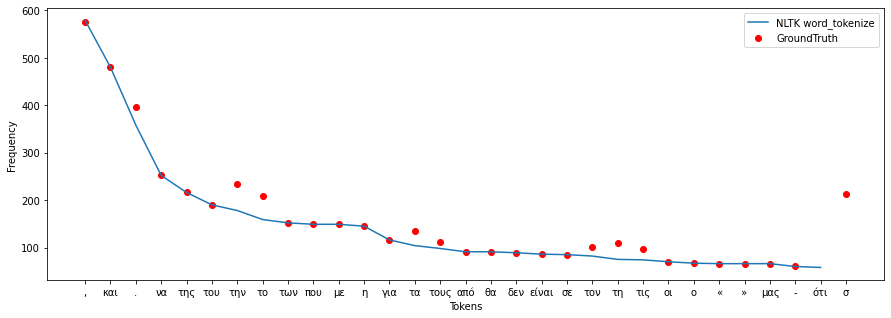

No. of groundTruthTokens =  11852
Relevant Tokens =  11286
Retrieved Tokens =  11652
Precision =  0.9685890834191555
Recall =  0.9522443469456632
F1 - Score =  0.9603471749489448


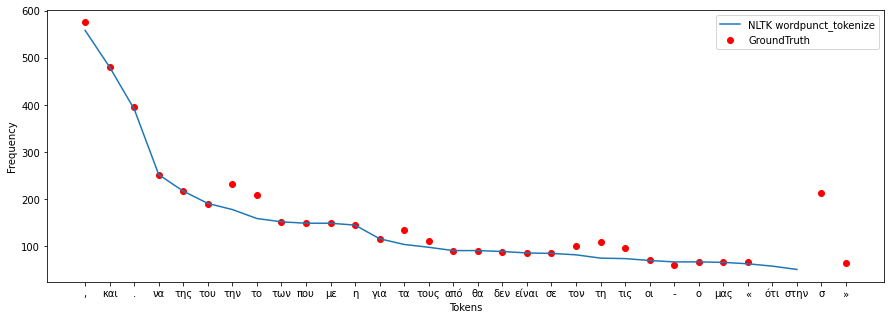

No. of groundTruthTokens =  11852
Relevant Tokens =  11229
Retrieved Tokens =  12513
Precision =  0.897386717813474
Recall =  0.9474350320620992
F1 - Score =  0.9217319926123537


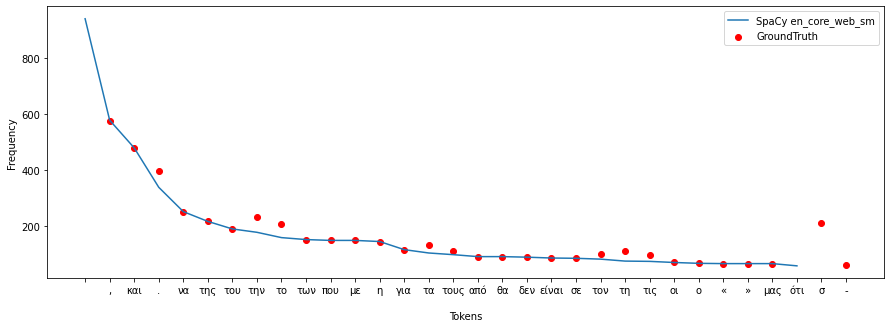

No. of groundTruthTokens =  11852
Relevant Tokens =  11746
Retrieved Tokens =  11793
Precision =  0.9960145849232596
Recall =  0.9910563617954775
F1 - Score =  0.9935292873757665


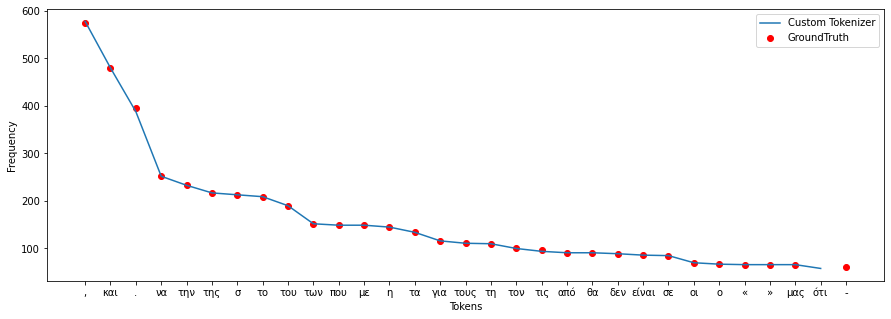

In [16]:
precision = calcPrecision(tokensWordTokenizeEL, groundTruthEL)    
recall = calcRecall(tokensWordTokenizeEL, groundTruthEL)
f1nltk = calcF1Score(precision, recall)
print("F1 - Score = ",f1nltk)
dicEL = FreqDist(tokensWordTokenizeEL)
filter_tokens1EL = dict([(m, n) for m, n in dicEL.items() if n == 1])
observed1_1 = len(filter_tokens1EL)/len(dicEL)
top30_1EL = FreqDist(tokensWordTokenizeEL).most_common(30)
top30_1TruthEL = FreqDist(groundTruthEL).most_common(30)
plt.figure(figsize=(15, 5))
plt.plot(*zip(*top30_1EL),label='NLTK word_tokenize')
plt.scatter(*zip(*top30_1TruthEL),label='GroundTruth',color = 'red')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.legend(loc="upper right")
plt.show()


precision = calcPrecision(tokensWordPunctTokenizeEL, groundTruthEL)    
recall = calcRecall(tokensWordPunctTokenizeEL, groundTruthEL)
f1nltk2 = calcF1Score(precision, recall)
print("F1 - Score = ",f1nltk2)
dic2EL = FreqDist(tokensWordPunctTokenizeEL)
filter_tokens2EL = dict([(m, n) for m, n in dic2EL.items() if n == 1])
observed1_2 = len(filter_tokens2EL)/len(dic2EL)
top30_2EL = FreqDist(tokensWordPunctTokenizeEL).most_common(30)
top30_2TruthEL = FreqDist(groundTruthEL).most_common(30)
plt.figure(figsize=(15, 5))
plt.plot(*zip(*top30_2EL),label='NLTK wordpunct_tokenize')
plt.scatter(*zip(*top30_2TruthEL),label='GroundTruth',color = 'red')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.legend(loc="upper right")
plt.show()

precision = calcPrecision(tokensSpacyEL, groundTruthEL)    
recall = calcRecall(tokensSpacyEL, groundTruthEL)
f1spcy = calcF1Score(precision, recall)
print("F1 - Score = ",f1spcy)

dic3EL = FreqDist(tokensSpacyEL)
filter_tokens3EL = dict([(m, n) for m, n in dic3EL.items() if n == 1])
observed1_3 = len(filter_tokens3EL)/len(dic3EL)
top30_3EL = FreqDist(tokensSpacyEL).most_common(30)
top30_3TruthEL = FreqDist(groundTruthEL).most_common(30)
plt.figure(figsize=(15, 5))
plt.plot(*zip(*top30_3EL),label='SpaCy en_core_web_sm')
plt.scatter(*zip(*top30_3TruthEL),label='GroundTruth',color = 'red')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.legend(loc="upper right")
plt.show()


precision = calcPrecision(tokenCustomEL, groundTruthEL)    
recall = calcRecall(tokenCustomEL, groundTruthEL)
f1custom = calcF1Score(precision, recall)
print("F1 - Score = ",f1custom)
dic4EL = FreqDist(tokenCustomEL)
filter_tokens4EL = dict([(m, n) for m, n in dic4EL.items() if n == 1])
observed1_4 = len(filter_tokens4EL)/len(dic4EL)
top30_4EL = FreqDist(tokenCustomEL).most_common(30)
top30_4TruthEL = FreqDist(groundTruthEL).most_common(30)
plt.figure(figsize=(15, 5))
plt.plot(*zip(*top30_4EL),label='Custom Tokenizer')
plt.scatter(*zip(*top30_4TruthEL),label='GroundTruth',color = 'red')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.legend(loc="upper right")
plt.show()

όπως βλέπουμε απο τα παραπάνω Plots, οι tokenizers συμφωνούν με το ground truth ως προς τις συχνότητες των tokens. Για πράδειγμα το η "τελεία" ή το "και" γνωρίζουμε οτι είναι πολύ συχνά tokens μέσα σε ένα Ελληνικό κείμενο.
Η διαφορά που μπορεί να παρατηρήσει κάποιος ως προς τον τρόπο tokenization μεταξύ των μεθόδων που εξετάζουμε, έχει να κάνει με το πως η κάθε μέθοδο "σπάει" σε tokens τα αρκτικόλεξα. Ο custom Tokenizer συμφωνεί σχεδόν απόλυτα με το ground truth, καθώς είχαμε την δυνατότητα να επέμβουμε όσο θέλουμε. 

In [17]:
info = {'percentage of tokens with Frequency = 1 per Tokenizer': ['NLTK word_tokenize','NLTK wordpunct_tokenize','SpaCy','Custom'], 'Frequency = 1 (%)': [observed1_1,observed1_2,observed1_3,observed1_4]}
print(tabulate(info,headers='keys',tablefmt='fancy_grid',showindex=True))


╒════╤═════════════════════════════════════════════════════════╤═════════════════════╕
│    │ percentage of tokens with Frequency = 1 per Tokenizer   │   Frequency = 1 (%) │
╞════╪═════════════════════════════════════════════════════════╪═════════════════════╡
│  0 │ NLTK word_tokenize                                      │            0.720422 │
├────┼─────────────────────────────────────────────────────────┼─────────────────────┤
│  1 │ NLTK wordpunct_tokenize                                 │            0.714066 │
├────┼─────────────────────────────────────────────────────────┼─────────────────────┤
│  2 │ SpaCy                                                   │            0.718154 │
├────┼─────────────────────────────────────────────────────────┼─────────────────────┤
│  3 │ Custom                                                  │            0.718685 │
╘════╧═════════════════════════════════════════════════════════╧═════════════════════╛


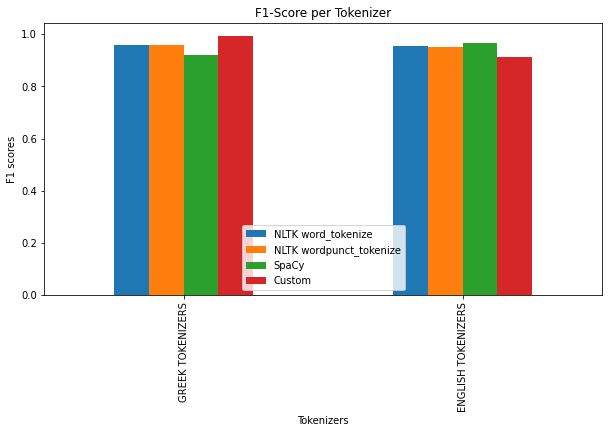

In [18]:
import pandas as pd
  
# create data
plotdata = pd.DataFrame({
    "NLTK word_tokenize":[f1nltk,f1nltkEN],
    "NLTK wordpunct_tokenize":[f1nltk2,f1nltkEN2],
    "SpaCy":[f1spcy,f1spacyEN],
    "Custom":[f1custom,f2custonEN]
    }, 
    index=["GREEK TOKENIZERS", "ENGLISH TOKENIZERS"]
)
plotdata.plot(kind="bar",figsize=[10,5])
plt.title("F1-Score per Tokenizer")
plt.xlabel("Tokenizers")
plt.ylabel("F1 scores")

plt.show()

Στο παραπάνω Plot παρατηρούμε οτι η διαδικασία του Tokenization έχει αρκετά υψηλό performance. Αξίζει να σημειωθεί οτι για τα Ελληνικά κείμενα ο custom tokenizer έχει δώσει πολύ καλά αποτελέσματα. 
Πολλά tokens που έχουν προκύψει απο την κάθε μια απο τις μεθόδους, ανάλογα με το topic που ασχολούμαστε πιθανώς να είναι απόλυτα σωστά. Η κύριες διαφορές ως προς το ground truth μετά απο παρατηρήσεις και ανάλυση, συσχετίζονται με τις συντομογραφίες όπως είναι τα "Mr." "Inc." και αντίστοιχα στα Ελληνικά "κ." ή παρόμοια συντομογραφία σχετικά με τίτλους εργασίας (π.χ Γεν. Γραμματέας).  

Τα λάθη που μπορεί να παρατηρήσει κανείς για την κάθε μέθοδο παρουσιάζονται παρακάτω:

Για την SpaCy en_core_web_sm tokenizer: <br>
Αυτή η μέθοδος δεν χειρίζεται καλά ορισμένες ακραίες περιπτώσεις, όπως συντομογραφίες. Επιπλέον, δεν χωρίζει tokens σε κενό διάστημα, επομένως μπορεί να χάσει ορισμένες περιπτώσεις όπου υπάρχουν πολλές λέξεις σε ένα token.

Για την NLTK word_tokenize: <br>
Υπάρχουν αρκετές περιπτώσεις που αυτή η μέθοδος μπορεί να αποτύχει.
- λέξεις με σημεία στίξης κολλητά. Όπως Αρκτικόλεξα. 
- Λέξεις με παύλες
- Λέξεις με απόστροφους
- Λέξεις με εκλείψεις

Για την NLTK wordpunct_tokenize: <br>
χάνει ορισμένες περιπτώσεις όπου οι λέξεις παρουσιάζονται μαζί, όπως "I'm" ή "don't".
Επίσης χάνει και τα αρκτικόλεξα όπως το "Mr."

Τα παραπάνω λάθη για την υλοποίηση τους custom tokenizer προσπάθησα να τα αποφύγω χρησιμοποιώντας κατάλληλα regex. 

Παρακάτω υλοποιούνται κάποιες βοηθητικές συναρτήσεις για τους υπολογισμούς των metrics και την ανάλυσή μας.

In [19]:
def calcdiffRatio(listOfsetences,referenceSet):
    counter = 0
    index = 0
    oldIndex = 0
    indexTest = 0
    oldIndexTest = 0
    if len(listOfsetences) > len(referenceSet):
        diffLen = len(listOfsetences) - len(referenceSet)
        counter = len(referenceSet) - diffLen
    elif len(listOfsetences) < len(referenceSet):
        diffLen = len(referenceSet) - len(listOfsetences)
        counter = len(referenceSet) - diffLen
    else:
        counter = len(referenceSet)
#     finalList = listOfsetences + referenceSet
#     final = set(finalList)
#     counter = (len(finalList)-len(final))
#     print(counter)
#     while index <= len(referenceSet)-1:
# #         oldIndex = index
#         while indexTest <= len(listOfsetences)-1:
#             print("Test",indexTest," ",listOfsetences[indexTest])
#             print("truth",index," ",referenceSet[index])
#             ratio = fuzz.WRatio(listOfsetences[indexTest],referenceSet[index])
#             print(ratio)
#             oldIndexTest = indexTest
#             if ratio >= 95:
#                 counter = counter + 1
# #                 index = index + 1
                
#                 indexTest = indexTest + 1
                
#                 break
#             else:

#                 indexTest = indexTest + 1
# #                 index = oldIndex + 1
                

                
        
#         index = index + 1
    return counter

def calculateMinLenOfSetence(listOfSetences,isTokenLEvel = False, isEnglish = False):
    if isTokenLEvel == False:
        result = min(len(sete) for sete in listOfSetences)
    else:
        minim = 1000
        for sete in listOfSetences:
            if isEnglish == False:
                tmpTokens = customTokenizerEL(sete) #xrisimopoiw to custom tokenizer pou efere ta kalutera apotelesmata
                if len(tmpTokens) <= minim:
                    minim = len(tmpTokens)
            else:
                tmpTokens = customTokenizer(sete) 
                if len(tmpTokens) <= minim:
                    minim = len(tmpTokens)
        
        result = minim

    return result

def calculateMaxLenOfSetence(listOfSetences,isTokenLEvel = False, isEnglish = False):
    if isTokenLEvel == False:
        result = max(len(sete) for sete in listOfSetences)
    else:
        maxim = 0
        for sete in listOfSetences:
            if isEnglish == False:
                tmpTokens = customTokenizerEL(sete) #xrisimopoiw to custom tokenizer pou efere ta kalutera apotelesmata
                if len(tmpTokens) >= maxim:
                    maxim = len(tmpTokens)
            else:
                tmpTokens = customTokenizer(sete) 
                if len(tmpTokens) >= maxim:
                    maxim = len(tmpTokens)
        
        result = maxim
    return result

def calculateMeanLenOfSetence(listOfSetences,isTokenLEvel = False, isEnglish = False):
    if isTokenLEvel == False:
        result = sum(len(sete) for sete in listOfSetences)/len(listOfSetences)
    else:
        sumOfLengths = 0
        for sete in listOfSetences:
            if isEnglish == False:
                tmpTokens = customTokenizerEL(sete) #xrisimopoiw to custom tokenizer pou efere ta kalutera apotelesmata
                sumOfLengths = len(tmpTokens)
            else:
                tmpTokens = customTokenizer(sete) 
                sumOfLengths = len(tmpTokens)
        result = sumOfLengths/len(listOfSetences)
    return result

In [20]:
info = {'Tokenizer': ['GREEK TOKENIZERS F1-Score', 'ENGLISH TOKENIZERS F1-score'], 'NLTK word_tokenize': [f1nltk,f1nltkEN], 'NLTK wordpunct_tokenize': [f1nltk2,f1nltkEN2],
       'SpaCy':[f1spcy,f1spacyEN],'Custom':[f1custom,f2custonEN]}
print(tabulate(info,headers='keys',tablefmt='fancy_grid',showindex=True))

╒════╤═════════════════════════════╤══════════════════════╤═══════════════════════════╤══════════╤══════════╕
│    │ Tokenizer                   │   NLTK word_tokenize │   NLTK wordpunct_tokenize │    SpaCy │   Custom │
╞════╪═════════════════════════════╪══════════════════════╪═══════════════════════════╪══════════╪══════════╡
│  0 │ GREEK TOKENIZERS F1-Score   │             0.959983 │                  0.960347 │ 0.921732 │ 0.993529 │
├────┼─────────────────────────────┼──────────────────────┼───────────────────────────┼──────────┼──────────┤
│  1 │ ENGLISH TOKENIZERS F1-score │             0.953972 │                  0.951344 │ 0.96766  │ 0.91277  │
╘════╧═════════════════════════════╧══════════════════════╧═══════════════════════════╧══════════╧══════════╛


# English Sentencizer

In [21]:


# from nltk.metrics import *
print("======================================ENGLISH=============================================")

print("================= NLTK word_tokenize =====================")
counter = calcdiffRatio(nltkSentTokens,groundTruthSentences)
prec1 = calcPrecision(nltkSentTokens,groundTruthSentences,False,counter) 
# print("Precision = ",prec)
rec1 = calcRecall(nltkSentTokens,groundTruthSentences,False,counter)
# print("Recall = ",rec)
f1nltkEN = calcF1Score(prec1, rec1)
# print("F1 - Score = ",f1nltkEN)

print("==================NLTK wordpunct_tokenize====================")
# print(nltkSentPunctTokenize[1].split())
counter = calcdiffRatio(nltkSentPunctTokenize,groundTruthSentences)
prec2 = calcPrecision(nltkSentPunctTokenize,groundTruthSentences,False,counter) 
rec2 = calcRecall(nltkSentPunctTokenize,groundTruthSentences,False,counter) 
f1nltkEN2 = calcF1Score(prec2, rec2)
# print("F1 - Score = ",f1nltkEN2)

print("================== SpaCy en_core_web_sm ====================")
counter = calcdiffRatio(setencesSpacy,groundTruthSentences)
prec3 = calcPrecision(setencesSpacy,groundTruthSentences,False,counter)    
rec3 = calcRecall(setencesSpacy,groundTruthSentences,False,counter)
f1spacyEN = calcF1Score(prec3, rec3)
print("F1 - Score = ",f1spacyEN)
# f1EN.append(f1spacyEN)

print("================== Custom Tokenizer ====================")
counter = calcdiffRatio(customSetences,groundTruthSentences)
precision = calcPrecision(customSetences, groundTruthSentences,False,counter)    
recall = calcRecall(customSetences, groundTruthSentences,False,counter)
f2custonEN = calcF1Score(precision, recall)
print("F1 - Score = ",f2custonEN)
# f1EN.append(f2custonEN)




info = {'Tokenizer': ['NLTK word_tokenize','NLTK wordpunct_tokenize','SpaCy','Custom'], 'F1-Score': [f1nltkEN,f1nltkEN2,f1spacyEN,f2custonEN],
       'Precision':[prec1,prec2,prec3,precision],'Recall':[rec1,rec2,rec3,recall]}
print(tabulate(info,headers='keys',tablefmt='fancy_grid',showindex=True))


======================================ENGLISH=============================================
================= NLTK word_tokenize =====================
No. of groundTruthSetences =  3914
Relevant Setences =  3863
Retrieved Setences =  3863
Precision =  1.0
No. of groundTruthSetences =  3914
Recall =  0.986969851814001
==================NLTK wordpunct_tokenize====================
No. of groundTruthSetences =  3914
Relevant Setences =  2922
Retrieved Setences =  4906
Precision =  0.5955972278842234
No. of groundTruthSetences =  3914
Recall =  0.7465508431272355
================== SpaCy en_core_web_sm ====================
No. of groundTruthSetences =  3914
Relevant Setences =  3914
Retrieved Setences =  3914
Precision =  1.0
No. of groundTruthSetences =  3914
Recall =  1.0
F1 - Score =  1.0
================== Custom Tokenizer ====================
No. of groundTruthSetences =  3914
Relevant Setences =  3829
Retrieved Setences =  3829
Precision =  1.0
No. of groundTruthSetences =  3914
Recall

Παρακάτω βλέπουμε τα min/max/mean values  για τις προτάσεις που προέκυψαν σε επίπεδο χαρακτήρων.


In [22]:
minvalueNLTKEN = calculateMinLenOfSetence(nltkSentTokens,isTokenLEvel = False, isEnglish = True)
minvalueNLTKpunctEN = calculateMinLenOfSetence(nltkSentPunctTokenize,isTokenLEvel = False, isEnglish = True)
minvalueSpacyEN = calculateMinLenOfSetence(setencesSpacy,isTokenLEvel = False, isEnglish = True)
minvalueCustomEN = calculateMinLenOfSetence(customSetences,isTokenLEvel = False, isEnglish = True)

maxvalueNLTKEN = calculateMaxLenOfSetence(nltkSentTokens,isTokenLEvel = False, isEnglish = True)
maxvalueNLTKpunctEN = calculateMaxLenOfSetence(nltkSentPunctTokenize,isTokenLEvel = False, isEnglish = True)
maxvalueSpacyEN = calculateMaxLenOfSetence(setencesSpacy,isTokenLEvel = False, isEnglish = True)
maxvalueCustomEN = calculateMaxLenOfSetence(customSetences,isTokenLEvel = False, isEnglish = True)

meanvalueNLTKEN = calculateMeanLenOfSetence(nltkSentTokens,isTokenLEvel = False, isEnglish = True)
meanvalueNLTKpunctEN = calculateMeanLenOfSetence(nltkSentPunctTokenize,isTokenLEvel = False, isEnglish = True)
meanvalueSpacyEN = calculateMeanLenOfSetence(setencesSpacy,isTokenLEvel = False, isEnglish = True)
meanvalueCustomEN = calculateMeanLenOfSetence(customSetences,isTokenLEvel = False, isEnglish = True)
print("====================================== English Char Level=============================")
# print("Min length of setence = ",minvalueNLTKEN)
# print("Max length of setence = ",maxvalueNLTKEN)
# print("Mean length of setence = ",meanvalueNLTKEN)

====================================== English Char Level=============================


In [23]:
info = {'Setencizer': ['NLTK word_tokenize','NLTK wordpunct_tokenize','SpaCy','Custom'], 'Min length': [minvalueNLTKEN,minvalueNLTKpunctEN,minvalueSpacyEN,minvalueCustomEN],
       'Max Length':[maxvalueNLTKEN,maxvalueNLTKpunctEN,maxvalueSpacyEN,maxvalueCustomEN],'Mean length':[meanvalueNLTKEN,meanvalueNLTKpunctEN,meanvalueSpacyEN,meanvalueCustomEN]}
print(tabulate(info,headers='keys',tablefmt='fancy_grid',showindex=True))

╒════╤═════════════════════════╤══════════════╤══════════════╤═══════════════╕
│    │ Setencizer              │   Min length │   Max Length │   Mean length │
╞════╪═════════════════════════╪══════════════╪══════════════╪═══════════════╡
│  0 │ NLTK word_tokenize      │            2 │         1157 │       128.691 │
├────┼─────────────────────────┼──────────────┼──────────────┼───────────────┤
│  1 │ NLTK wordpunct_tokenize │            2 │         1157 │       101.126 │
├────┼─────────────────────────┼──────────────┼──────────────┼───────────────┤
│  2 │ SpaCy                   │            1 │         1160 │       127.076 │
├────┼─────────────────────────┼──────────────┼──────────────┼───────────────┤
│  3 │ Custom                  │            2 │          722 │       129.843 │
╘════╧═════════════════════════╧══════════════╧══════════════╧═══════════════╛


Ας δούμε τώρα, πως διαμορφώνονται οι αντίστοιχες τιμές μετρώντας σε επίπεδο token.

In [24]:
minvalueNLTKEN = calculateMinLenOfSetence(nltkSentTokens,isTokenLEvel = True, isEnglish = True)
minvalueNLTKpunctEN = calculateMinLenOfSetence(nltkSentPunctTokenize,isTokenLEvel = True, isEnglish = True)
minvalueSpacyEN = calculateMinLenOfSetence(setencesSpacy,isTokenLEvel = True, isEnglish = True)
minvalueCustomEN = calculateMinLenOfSetence(customSetences,isTokenLEvel = True, isEnglish = True)

maxvalueNLTKEN = calculateMaxLenOfSetence(nltkSentTokens,isTokenLEvel = True, isEnglish = True)
maxvalueNLTKpunctEN = calculateMaxLenOfSetence(nltkSentPunctTokenize,isTokenLEvel = True, isEnglish = True)
maxvalueSpacyEN = calculateMaxLenOfSetence(setencesSpacy,isTokenLEvel = True, isEnglish = True)
maxvalueCustomEN = calculateMaxLenOfSetence(customSetences,isTokenLEvel = True, isEnglish = True)

meanvalueNLTKEN = calculateMeanLenOfSetence(nltkSentTokens,isTokenLEvel = True, isEnglish = True)
meanvalueNLTKpunctEN = calculateMeanLenOfSetence(nltkSentPunctTokenize,isTokenLEvel = True, isEnglish = True)
meanvalueSpacyEN = calculateMeanLenOfSetence(setencesSpacy,isTokenLEvel = True, isEnglish = True)
meanvalueCustomEN = calculateMeanLenOfSetence(customSetences,isTokenLEvel = True, isEnglish = True)
print("====================================== English token Level=============================")
# print(minvalueNLTKEN)
# print(maxvalueNLTKEN)
# print(meanvalueNLTKEN)

====================================== English token Level=============================


In [25]:
info = {'Setencizer': ['NLTK word_tokenize','NLTK wordpunct_tokenize','SpaCy','Custom'], 'Min length': [minvalueNLTKEN,minvalueNLTKpunctEN,minvalueSpacyEN,minvalueCustomEN],
       'Max Length':[maxvalueNLTKEN,maxvalueNLTKpunctEN,maxvalueSpacyEN,maxvalueCustomEN],'Mean length':[meanvalueNLTKEN,meanvalueNLTKpunctEN,meanvalueSpacyEN,meanvalueCustomEN]}
print(tabulate(info,headers='keys',tablefmt='fancy_grid',showindex=True))

╒════╤═════════════════════════╤══════════════╤══════════════╤═══════════════╕
│    │ Setencizer              │   Min length │   Max Length │   Mean length │
╞════╪═════════════════════════╪══════════════╪══════════════╪═══════════════╡
│  0 │ NLTK word_tokenize      │            1 │          276 │   0.00103546  │
├────┼─────────────────────────┼──────────────┼──────────────┼───────────────┤
│  1 │ NLTK wordpunct_tokenize │            1 │          276 │   0.000815328 │
├────┼─────────────────────────┼──────────────┼──────────────┼───────────────┤
│  2 │ SpaCy                   │            1 │          278 │   0.00102197  │
├────┼─────────────────────────┼──────────────┼──────────────┼───────────────┤
│  3 │ Custom                  │            1 │          129 │   0.00104466  │
╘════╧═════════════════════════╧══════════════╧══════════════╧═══════════════╛


Εάν συγκρίνει κανείς τους 2 παραπάνω πίνακες θα παρατηρήσει οτι υπάρχει αρκετά μεγάλη διαφορά στο μήκος πρότασης. Αυτό οφείλεται στο γεγονός οτι σε επίπεδο χαρακτήρα θα συμπεριληφθούν κενά και σημεία στίξης. Αντίθετα όμως εάν μετρήσουμε το μήκος σε επίπεδο token, τότε θα φανεί μικρότερο, διότι πιθανώς κάποιο token να έχει μαζί του τα σημεία στίξης όπως μια συντομογραφία. Επίσης σε αυτήν την περίπτωση σπάνια θα δούμε κενά σαν ξεχωριστό token. 

# Greek Setencizer

In [26]:
from nltk.metrics import *
print("======================================GREEK=============================================")

print("================= NLTK word_tokenize =====================")
counter = calcdiffRatio(setenceWordTokenizeEL,finalTruthSentEL)
prec1 = calcPrecision(setenceWordTokenizeEL,finalTruthSentEL,False,counter) 
# print("Precision = ",prec)
rec1 = calcRecall(setenceWordTokenizeEL,finalTruthSentEL,False,counter)
# print("Recall = ",rec)
f1nltkEN = calcF1Score(prec1, rec1)
print("F1 - Score = ",f1nltkEN)

print("==================NLTK wordpunct_tokenize====================")
# print(nltkSentPunctTokenize[1].split())
counter = calcdiffRatio(setenceWordPunctTokenizeEL,finalTruthSentEL)
prec2 = calcPrecision(setenceWordPunctTokenizeEL,finalTruthSentEL,False,counter) 
rec2 = calcRecall(setenceWordPunctTokenizeEL,finalTruthSentEL,False,counter) 
f1nltkEN2 = calcF1Score(prec2, rec2)
print("F1 - Score = ",f1nltkEN2)

print("================== SpaCy el_core_web_sm ====================")
counter = calcdiffRatio(setencesSpacyEL,finalTruthSentEL)
prec3 = calcPrecision(setencesSpacyEL,finalTruthSentEL,False,counter)    
rec3 = calcRecall(setencesSpacyEL,finalTruthSentEL,False,counter)
f1spacyEN = calcF1Score(prec3, rec3)
print("F1 - Score = ",f1spacyEN)
# f1EN.append(f1spacyEN)
print("================== Custom Tokenizer ====================")
counter = calcdiffRatio(setencesCustomListEL,finalTruthSentEL)
precision = calcPrecision(setencesCustomListEL, finalTruthSentEL,False,counter)    
recall = calcRecall(setencesCustomListEL, finalTruthSentEL,False,counter)
f2custonEL = calcF1Score(precision, recall)
print("F1 - Score = ",f2custonEL)
# f1EN.append(f2custonEN)

======================================GREEK=============================================
================= NLTK word_tokenize =====================
No. of groundTruthSetences =  374
Relevant Setences =  371
Retrieved Setences =  371
Precision =  1.0
No. of groundTruthSetences =  374
Recall =  0.9919786096256684
F1 - Score =  0.9959731543624161
==================NLTK wordpunct_tokenize====================
No. of groundTruthSetences =  374
Relevant Setences =  371
Retrieved Setences =  371
Precision =  1.0
No. of groundTruthSetences =  374
Recall =  0.9919786096256684
F1 - Score =  0.9959731543624161
================== SpaCy el_core_web_sm ====================
No. of groundTruthSetences =  374
Relevant Setences =  322
Retrieved Setences =  426
Precision =  0.755868544600939
No. of groundTruthSetences =  374
Recall =  0.8609625668449198
F1 - Score =  0.8050000000000002
================== Custom Tokenizer ====================
No. of groundTruthSetences =  374
Relevant Setences =  369
Retri

In [27]:
info = {'Tokenizer': ['NLTK word_tokenize','NLTK wordpunct_tokenize','SpaCy','Custom'], 'F1-Score': [f1nltkEN,f1nltkEN2,f1spacyEN,f2custonEL],
       'Precision':[prec1,prec2,prec3,precision],'Recall':[rec1,rec2,rec3,recall]}
print(tabulate(info,headers='keys',tablefmt='fancy_grid',showindex=True))

╒════╤═════════════════════════╤════════════╤═════════════╤══════════╕
│    │ Tokenizer               │   F1-Score │   Precision │   Recall │
╞════╪═════════════════════════╪════════════╪═════════════╪══════════╡
│  0 │ NLTK word_tokenize      │   0.995973 │    1        │ 0.991979 │
├────┼─────────────────────────┼────────────┼─────────────┼──────────┤
│  1 │ NLTK wordpunct_tokenize │   0.995973 │    1        │ 0.991979 │
├────┼─────────────────────────┼────────────┼─────────────┼──────────┤
│  2 │ SpaCy                   │   0.805    │    0.755869 │ 0.860963 │
├────┼─────────────────────────┼────────────┼─────────────┼──────────┤
│  3 │ Custom                  │   0.98008  │    0.973615 │ 0.986631 │
╘════╧═════════════════════════╧════════════╧═════════════╧══════════╛


Τα λάθη που μπορεί κανείς να παρατηρήσει για την κάθε μέθοδο είναι τα παρακάτω:

Για την NLTK sent_tokenize(): <br>
Αυτή η μέθοδος δεν χειρίζεται καλά ορισμένες συντομογραφίες, όπως Mr. and Mrs. Έχει επίσης δυσκολίες με ορισμένα σημεία στίξης, όπως οι παρενθέσεις.

Για NLTK PunktSentenceTokenizer: <br>
Αυτή η μέθοδος δεν λειτουργεί καλά με μη τυπικό/κλασσικό αγγλικό κείμενο, όπως κείμενο με άτυπη γλώσσα (informal language) ή κείμενο με ασυνήθιστα σημεία στίξης.

Για Spacy en_core_web_sm & el_core_web_sm: <br>
Αυτές οι μέθοδοι είναι στατιστικά μοντέλα για τα Αγγλικά και Ελληνικά αντίστοιχα, που εκπαιδεύτηκαν σε δεδομένα απο το διαδίκτυο. Καλύπτουν ένα ευρύ φάσμα αγγλικών/ελληνικών, αλλά δεν είναι τέλεια. Για παράδειγμα, ενδέχεται να μην είναι σε θέση να χειριστούν σωστά περιπτώσεις που αφορούν λέξεις αργκό ή συντομογραφίες. Επιπλέον, δεν μπορεί να χειριστεί σωστά ονόματα, τοποθεσίες ή οργανισμούς.


In [28]:
minvalueNLTKEL = calculateMinLenOfSetence(setenceWordTokenizeEL,isTokenLEvel = False, isEnglish = False)
minvalueNLTKpunctEL = calculateMinLenOfSetence(setenceWordPunctTokenizeEL,isTokenLEvel = False, isEnglish = False)
minvalueSpacyEL = calculateMinLenOfSetence(setencesSpacyEL,isTokenLEvel = False, isEnglish = False)
minvalueCustomEL = calculateMinLenOfSetence(setencesCustomListEL,isTokenLEvel = False, isEnglish = False)

maxvalueNLTKEL = calculateMaxLenOfSetence(setenceWordTokenizeEL,isTokenLEvel = False, isEnglish = False)
maxvalueNLTKpunctEL = calculateMaxLenOfSetence(setenceWordPunctTokenizeEL,isTokenLEvel = False, isEnglish = False)
maxvalueSpacyEL = calculateMaxLenOfSetence(setencesSpacyEL,isTokenLEvel = False, isEnglish = False)
maxvalueCustomEL = calculateMaxLenOfSetence(setencesCustomListEL,isTokenLEvel = False, isEnglish = False)

meanvalueNLTKEL = calculateMeanLenOfSetence(setenceWordTokenizeEL,isTokenLEvel = False, isEnglish = False)
meanvalueNLTKpunctEL = calculateMeanLenOfSetence(setenceWordPunctTokenizeEL,isTokenLEvel = False, isEnglish = False)
meanvalueSpacyEL = calculateMeanLenOfSetence(setencesSpacyEL,isTokenLEvel = False, isEnglish = False)
meanvalueCustomEL = calculateMeanLenOfSetence(setencesCustomListEL,isTokenLEvel = False, isEnglish = False)
print("====================================== Greek Char Level=============================")

====================================== Greek Char Level=============================


In [29]:
info = {'Setencizer': ['NLTK word_tokenize','NLTK wordpunct_tokenize','SpaCy','Custom'], 'Min length': [minvalueNLTKEL,minvalueNLTKpunctEL,minvalueSpacyEL,minvalueCustomEL],
       'Max Length':[maxvalueNLTKEL,maxvalueNLTKpunctEL,maxvalueSpacyEL,maxvalueCustomEL],'Mean length':[meanvalueNLTKEL,meanvalueNLTKpunctEL,meanvalueSpacyEL,meanvalueCustomEL]}
print(tabulate(info,headers='keys',tablefmt='fancy_grid',showindex=True))

╒════╤═════════════════════════╤══════════════╤══════════════╤═══════════════╕
│    │ Setencizer              │   Min length │   Max Length │   Mean length │
╞════╪═════════════════════════╪══════════════╪══════════════╪═══════════════╡
│  0 │ NLTK word_tokenize      │            4 │          742 │       186.221 │
├────┼─────────────────────────┼──────────────┼──────────────┼───────────────┤
│  1 │ NLTK wordpunct_tokenize │            4 │          742 │       186.221 │
├────┼─────────────────────────┼──────────────┼──────────────┼───────────────┤
│  2 │ SpaCy                   │            1 │          623 │       162.207 │
├────┼─────────────────────────┼──────────────┼──────────────┼───────────────┤
│  3 │ Custom                  │            2 │          742 │       182.264 │
╘════╧═════════════════════════╧══════════════╧══════════════╧═══════════════╛


In [30]:
minvalueNLTKEL = calculateMinLenOfSetence(setenceWordTokenizeEL,isTokenLEvel = True, isEnglish = False)
minvalueNLTKpunctEL = calculateMinLenOfSetence(setenceWordPunctTokenizeEL,isTokenLEvel = True, isEnglish = False)
minvalueSpacyEL = calculateMinLenOfSetence(setencesSpacyEL,isTokenLEvel = True, isEnglish = False)
minvalueCustomEL = calculateMinLenOfSetence(setencesCustomListEL,isTokenLEvel = True, isEnglish = False)

maxvalueNLTKEL = calculateMaxLenOfSetence(setenceWordTokenizeEL,isTokenLEvel = True, isEnglish = False)
maxvalueNLTKpunctEL = calculateMaxLenOfSetence(setenceWordPunctTokenizeEL,isTokenLEvel = True, isEnglish = False)
maxvalueSpacyEL = calculateMaxLenOfSetence(setencesSpacyEL,isTokenLEvel = True, isEnglish = False)
maxvalueCustomEL = calculateMaxLenOfSetence(setencesCustomListEL,isTokenLEvel = True, isEnglish = False)

meanvalueNLTKEL = calculateMeanLenOfSetence(setenceWordTokenizeEL,isTokenLEvel = True, isEnglish = False)
meanvalueNLTKpunctEL = calculateMeanLenOfSetence(setenceWordPunctTokenizeEL,isTokenLEvel = True, isEnglish = False)
meanvalueSpacyEL = calculateMeanLenOfSetence(setencesSpacyEL,isTokenLEvel = True, isEnglish = False)
meanvalueCustomEL = calculateMeanLenOfSetence(setencesCustomListEL,isTokenLEvel = True, isEnglish = False)
print("====================================== Greek Token Level=============================")

====================================== Greek Token Level=============================


In [31]:
info = {'Setencizer': ['NLTK word_tokenize','NLTK wordpunct_tokenize','SpaCy','Custom'], 'Min length': [minvalueNLTKEL,minvalueNLTKpunctEL,minvalueSpacyEL,minvalueCustomEL],
       'Max Length':[maxvalueNLTKEL,maxvalueNLTKpunctEL,maxvalueSpacyEL,maxvalueCustomEL],'Mean length':[meanvalueNLTKEL,meanvalueNLTKpunctEL,meanvalueSpacyEL,meanvalueCustomEL]}
print(tabulate(info,headers='keys',tablefmt='fancy_grid',showindex=True))

╒════╤═════════════════════════╤══════════════╤══════════════╤═══════════════╕
│    │ Setencizer              │   Min length │   Max Length │   Mean length │
╞════╪═════════════════════════╪══════════════╪══════════════╪═══════════════╡
│  0 │ NLTK word_tokenize      │            2 │          129 │     0.0350404 │
├────┼─────────────────────────┼──────────────┼──────────────┼───────────────┤
│  1 │ NLTK wordpunct_tokenize │            2 │          129 │     0.0350404 │
├────┼─────────────────────────┼──────────────┼──────────────┼───────────────┤
│  2 │ SpaCy                   │            0 │           99 │     0         │
├────┼─────────────────────────┼──────────────┼──────────────┼───────────────┤
│  3 │ Custom                  │            1 │          129 │     0.0343008 │
╘════╧═════════════════════════╧══════════════╧══════════════╧═══════════════╛


Για να μετρήσω σε επίπεδο token χρησιμοποίησα τον δικό μου custom tokenizer που είδαμε οτι έφερε πολύ καλά αποτελέσματα. Απο τον παραπάνω πίνακα μπορούμε να δούμε οτι για την περίπτωση του Spacy, οι μετρήσεις μας έχουν φέρει μηδενικές τιμές. Αυτό πιθανώς μπορεί να οφείλεται στα regex Που χρησιμοποιεί ο tokenizer κατα τα οποία να "πετάει έξω" κάποια στοιχεία όπως είναι τα περιττά κενά. 